### matplotlib
1. 一个绘制图库，用于绘制各种静态、动态和交互式的图表。
2. 图表类型： 折线图、散点图、条形图、直方图、饼图、箱线图等。
3. 定制化： 可以调整颜色、标签、图例等。
4. 可以与其他的库集成： Numpy Pandas等
5. 数据类型可以是  列表、数组、 数据框等

##### 使用方法

1. 导库 
```python
import matplotlib.pylots as plt
```
2. 准备数据
```python
#   生成 X 轴 数据
   x = np.linspace(0,10,100)
#   生成 Y 轴 数据
   y = np.sin(x)
```

3. 绘制图形
 -  折线图 ： plt.plot(x,y)
 -  散点图 ： plt.scatter(x,y)
 -  条形图 ： plt.bar(x,y)
 -  直方图 ： plt.hist(x)
 -  饼图 ： plt.pie(x)
 -  箱线图 ： plt.boxplot(x)
 -  其他 ： 可以使用 plt 中的其他函数进行绘制


3.1. 折线图
 - 使用指定符号样式绘制图
 - 顺序 ：[marker] [line] [color] 
 - [marker]: 符号样式 
 - [line]: 线条样式
 - [color]: 颜色
 -  示例 ： plt.plot(x,y,'ro--')


    常见符号列表
    '.'：点
    'o'：圆圈
    's'：正方形
    '^'：上三角形
    'v'：下三角形
    '<'：左三角形
    '>'：右三角形
    '*'：星号
    '+'：加号
    'x'：叉号


 4. 添加图形元素
 -  添加标题 ： plt.title('title')
 -  添加 x 轴标签 ： plt.xlabel('x label')
 -  添加 y 轴标签 ： plt.ylabel('y label')
 -  添加图例 ： plt.legend()
 -  其他 ： 可以使用 plt 中的其他函数进行添加

 5. 显示或保存图形
 -  显示图形 ： plt.show()
 -  保存图形 ： plt.savefig('filename.png')
 -  其他 ： 可以使用 plt 中的其他函数进行保存

In [ ]:
# 1. import sklearn datasets 
from sklearn.datasets import load_breast_cancer
# This function is a utility in scikit-learn that allows you to split your dataset into training and testing subsets
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

# save the dataset to a file
import joblib


# 2. 加载数据集，拆分数据集为训练集和测试集  7：3
X ,y = load_breast_cancer( return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)

# freatures: X.shape[1] ,X.shape[-1]
print("X's features:{}".format(X.shape[1]))

# print("X_train:{}".format(X_train))
# print("X_test:{}".format(X_test))

# print("y_train:{}".format(y_train))
# print("y_test:{}".format(y_test))

# save the datatset for testing to a file
test_dataset = {
    "X_test":X_test,
    "y_test":y_test
}
joblib.dump(test_dataset,"breast_cancer_test_dataset.pkl")



# 3. 设定参数 ， 权重参数、超参数、训练次数

theta = np.random.randn(1,30)
bias = 0



#hyper parameters
lr = [0.1,0.01,0.001,0.5]

# training times
epochs = 5000

# 4. 模型的计算函数
def forward(x,theta,bias):
    # linear operation (multiple)
    z =np.dot(theta,x.T) + bias
    # sigmoid
    y_hat = 1 / (1 + np.exp(-z)) 
    return y_hat

# 5. 计算损失函数 (loss function)
def loss(y,y_hat):
    e = 1e-8
    return -y * np.log(y_hat + e) - (1 -y ) * np.log(1 - y_hat + e)


# 6. 计算梯度  ： theta (weight parameters) 、bias(weight parameters) 
def calc_gradient(x,y,y_hat):
    # calculate gradient 
    m = x.shape[-1]
    # calculate gradient for theta
    delta_theta = np.dot((y_hat - y),x) / m
    # calculate gradient for bias
    delta_bias = np.mean(y_hat - y)
    return delta_theta, delta_bias

# 画图
plt.plot(X_train,y_train,'o')
plt.show()




# 7. 模型训练过程
acc = float(0)
while True:
    
    for learn in lr:


        for i in range(epochs):
        # forward
            y_hat = forward(X_train,theta,bias)
            # calculate loss
            loss_val = loss(y_train,y_hat)
            # calculate gradient
            delta_theta, delta_bias = calc_gradient(X_train,y_train,y_hat)
            # update theta and bias
            theta = theta -learn * delta_theta
            bias = bias - learn * delta_bias
            if i % 1000 == 0:
                # calculate accuracy
                acc = np.mean(np.round(y_hat) == y_train)
                print(f"epoch:{i}, loss:{np.mean(loss_val)}, acc:{acc}")
        
            # plt.plot(X_train,y_hat.T,'+')
            # plt.show()


    if acc >= 0.95:
        break



# lr is variable
# acc_history = float(0)  
# while True:
#     # forward
#     y_hat = forward(X_train,theta,bias)
#     # calculate loss
#     loss_val = loss(y_train,y_hat)
#     # calculate gradient
#     delta_theta, delta_bias = calc_gradient(X_train,y_train,y_hat)
#     # update theta and bias
#     theta = theta -lr * delta_theta
#     bias = bias - lr * delta_bias

#     if i % 100 == 0:
#         acc = np.mean(np.round(y_hat) == y_train)
#         print(f"epoch:{i}, loss:{np.mean(loss_val)}, acc:{acc}")
#         if acc > acc_history:
#             lr = lr * 0.3 + lr
            
#             print(f"lr:{lr}","acc_history:{acc_history}","acc:{acc}")
#         else:
#             lr = lr - lr * 0.3
#             acc_history = acc
#             print(f"lr:{lr}","acc_history:{acc_history}","acc:{acc}")

#     if acc_history >= 0.95:
#         break
#             # save the model parameters to a file


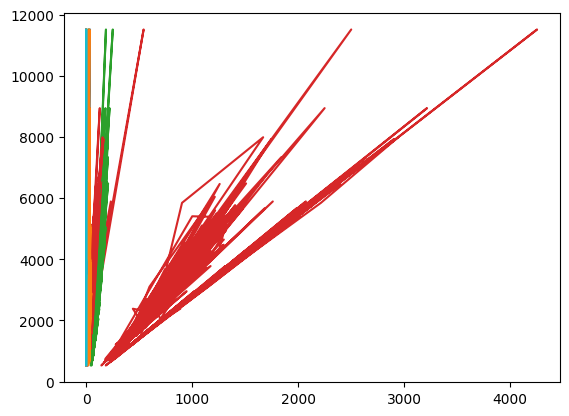

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 1. import sklearn datasets 
from sklearn.datasets import load_breast_cancer
# This function is a utility in scikit-learn that allows you to split your dataset into training and testing subsets
from sklearn.model_selection import train_test_split


X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


theta = np.random.randn(1, 30)
bias =1

z = np.dot(theta, X_train.T) + bias


plt.plot(X_train,z.T)
plt.show()